# Image Plotting
### How to show images in python

If we have an already saved image, and we want to read it into python, we can use one of the modules from matplotlib, [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). 

# Vocabulary for today

<b><ul>
    <li>fits</li>
    <li>pixel</li>
    </ul></b>

Let's now import plt like we did last week. 


In [1]:
import matplotlib.pyplot as plt

### Basic Command

The fundamental function to show an image is `plt.imshow({image_data})`, where "image_data" is are array values of your image. 

In python, we can't simply display the image, we first must read in the image and convert the pixel values to something that the computer will understand. 

Depending on the type of image you want to display, there are a few different methods to do this. Today we will work through 2 methods. The first is for .png images, which are what most typical images are, and the second is for a "fits" image, which is how we store real photometry data in astronomy. 

The first .png we will work with is named `M33_zoomed.png`, which if you pulled the github should already be in your directory. If you just downloaded this notebook, you must also download the image. 

In order to read in this image data, we need to use a new package `PIL.Image`, which we will import now.

In [2]:
from PIL import Image

If you are getting an error message that this package is not recognized, please run the command `!pip install PIL`, in the cell below, otherwise skip


Now let's read in our Image

In [3]:
import numpy as np

img = np.asarray(Image.open('M33_zoomed.png'))
print(repr(img))

array([[[20, 18, 20],
        [20, 18, 20],
        [19, 19, 20],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[20, 18, 21],
        [20, 18, 21],
        [20, 20, 22],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 18, 21],
        [19, 19, 21],
        [18, 18, 20],
        ...,
        [18, 18, 18],
        [21, 21, 21],
        [20, 19, 19]],

       ...,

       [[19, 19, 20],
        [19, 19, 20],
        [20, 19, 18],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [20, 20, 19]],

       [[19, 19, 20],
        [19, 19, 20],
        [19, 19, 19],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [20, 19, 18]],

       [[19, 19, 21],
        [18, 18, 19],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [20, 19, 18]]], shape=(1070, 1441, 3), dtype=uint8)


### Thought Provoking Questions?: 
What are we seeing in this print statement? 

What is the shape? Have we seen an array that has the format (x, y, z) before? 

Now let's plot this!

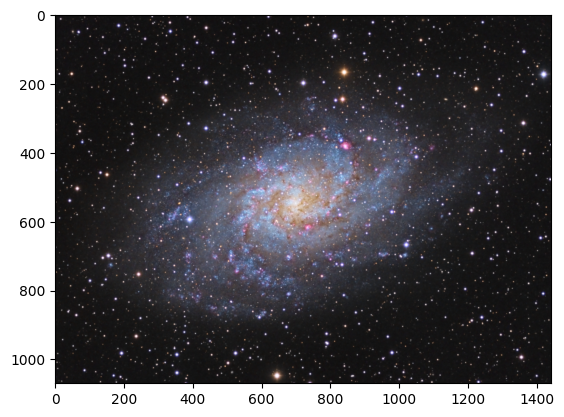

In [4]:
imgplot = plt.imshow(img)

Wow!! What a pretty galaxy! 

Does anyone know which galaxy this is?? Or Why Tobin thinks its special?

Now that we have successfully plotted our image, what are the values along the x and y axis? 

In [5]:
# Answer Question

In the cell below, try and use python to "crop" the image, showing less of the sky around the image. 

Hint: Use a plt._______ command, underneath our first plotting command

In Astronomy, most of the images that we have are what's called "False-Color" Images. Meaning that the colors are real, but rather assinged to specific waveleths. 

If we don't like the colors that our image is representing, we can remove the color from the image all-together. 

In the cell below, let's remove the color from our image, and just show a black and white verion. Google around, and see how we might do this. 

As mentioned, in Astronomy, we often have images that are in a single wavelength. Most of the time, these images stored in `fits` images, which are a powerful type of file, that can compress data. 

Let's go more in depth, and transition from using our pretty image found on the internet to actual data taken by the Hubble Space Telescope.

The name of this file is `M33_Cluster_F475W.fits`

"F475W" is the name of the filter, meaning that the telescope is only allowing in light at 475 nm, and blocking out the rest of the light. 

In order to read in this data, we need yet another package:
`astropy`. Astropy is a specific python package that was developed for astronomers! You can read more about astropy [here](https://www.astropy.org/)

In this notebook, we are going to be working with a specific module `fits`, that we need to load in. 


In [6]:
from astropy.io import fits

If you do not recognize astropy, go to your terminal, and run `pip install astropy`

Now we need to read in our image data 

In [7]:
image_file = "M33_Cluster_F475W.fits"

hdu_list = fits.open(image_file)
print(hdu_list.info())


Filename: M33_Cluster_F475W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      78   (303, 301)   float32   
None


`fits` images can have several different extentions, or different images all within the same file. The `.info()` command tells us how many extentions our file has, the type of each extention, and the dimensions. 

In order to get the image data we need to run:

In [8]:
image_data = hdu_list[0].data

Notice our `[0]` after the hdu_list. This is making sure that we access the zeroth extention of the file

In [9]:
print(image_data)

[[0.49477592 0.51810294 0.47036135 ... 0.36760563 0.3320121  0.35143042]
 [0.6591975  0.53659827 0.4061936  ... 0.35838366 0.36189097 0.38040093]
 [0.61513585 0.4990176  0.3621636  ... 0.35320884 0.3637324  0.35983983]
 ...
 [0.27771923 0.2846968  0.27697363 ... 0.3088221  0.34224832 0.33863708]
 [0.29452822 0.29018176 0.29776734 ... 0.30698767 0.30661982 0.31107208]
 [0.32746398 0.3054679  0.3299154  ... 0.33118325 0.29834065 0.26248673]]


### Repeat of our Thought Provoking Questions?: 
What are we seeing in this print statement? 

What is the shape? 

How is this differnt than what we saw before? Why?

#### Shortcut: 
If we know that our fits file only has one extention, we can do a little shortcut

In [10]:
image_data = fits.getdata(image_file)
print(image_data)

[[0.49477592 0.51810294 0.47036135 ... 0.36760563 0.3320121  0.35143042]
 [0.6591975  0.53659827 0.4061936  ... 0.35838366 0.36189097 0.38040093]
 [0.61513585 0.4990176  0.3621636  ... 0.35320884 0.3637324  0.35983983]
 ...
 [0.27771923 0.2846968  0.27697363 ... 0.3088221  0.34224832 0.33863708]
 [0.29452822 0.29018176 0.29776734 ... 0.30698767 0.30661982 0.31107208]
 [0.32746398 0.3054679  0.3299154  ... 0.33118325 0.29834065 0.26248673]]


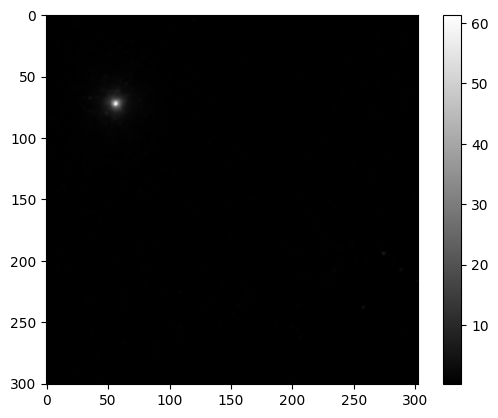

In [18]:
plt.imshow(image_data, cmap="gray")
plt.colorbar()

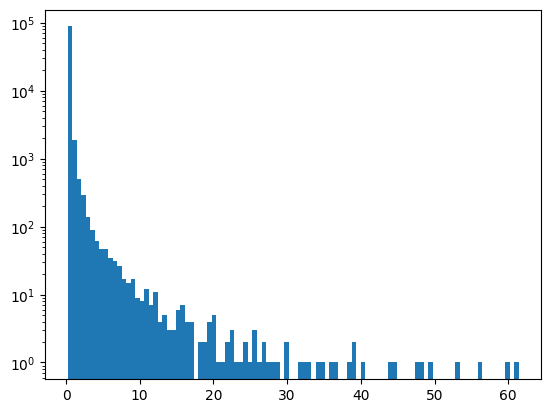

In [17]:
plt.hist(image_data.flatten(), bins=100)
plt.yscale('log')

Our image now needs a little work compared to the internet image. 

Let's use the key word arguments `vmin` and `vmax` to get an image that looks more reasonable

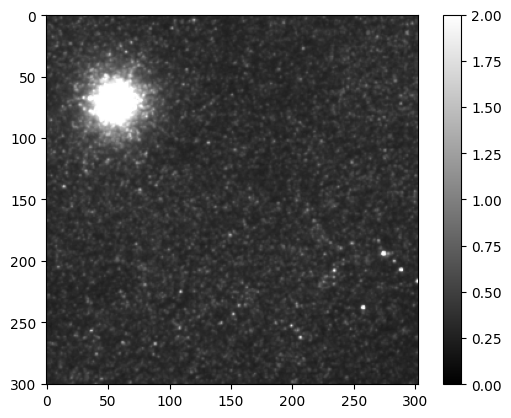

In [22]:
# Add some vmin and vmax 
plt.imshow(image_data, cmap="gray", vmin=0, vmax=2)
plt.colorbar()

Can see see the star cluster?

Let's center the cluster in the middle of our cutout